# Horsebet extended
In this paper we consider extended horsebet problem, where Mr Black's result is calculated as 
$$\max(1 - |b - x|, x)$$
where $x$ is the result selected by Mr Black and $b$ is the barrier value, $0 \leq b \leq 1$.

### Probability of winning in the next race
Let's start from calculating the probability of winning when barrier is equal to $b$ and Mr White selected result $x$.
First of all, function of probability changes its behaviour in two points: $x = 1 - b$ and $x = \frac{1-b}{2}$, where $0 \leq x\leq 1, 0 \leq b \leq 1$. Thus we need to consider two situations:
- $1-b > \frac{1-b}{2}$,
- $1-b \leq \frac{1-b}{2}.$
<br> After simple calculations we obtain that two separately considered intervals for $b$ are $[0, \frac{1}{3})$ and $[\frac{1}{3}, 1]$.

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
plt.rcParams['figure.figsize'] = [12, 6]

In [13]:
def one_race_winning_probability(X, b):
    # distance of x from 1
    dw = 1 - X
    # boundaries of x that Mr Black can pick and win
    left = np.maximum(0, b - dw)
    right = np.minimum(1, b + dw)
    
    # probabilities of Black winning
    probabilities = [None] * len(X)
    
    for i in range(len(X)):
        if X[i] < right[i]:
            probabilities[i] = 1 - left[i]
        else:
            probabilities[i] = right[i] - left[i] + dw[i]
    # we returm 1 - probabilities as we are interested in White winning
    return 1 - np.array(probabilities)
           

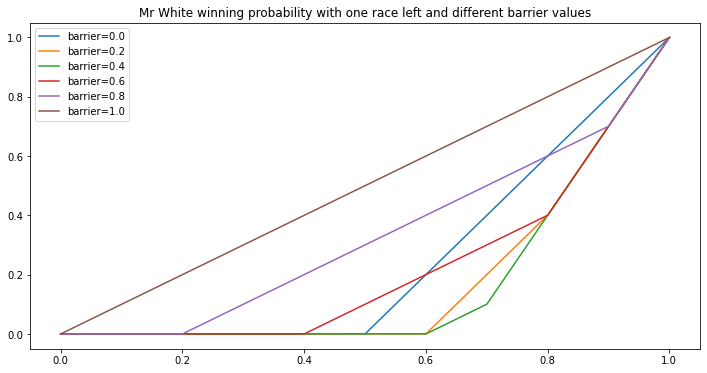

In [14]:
X = np.linspace(0, 1, 10000)
barriers = np.round(np.linspace(0, 1, 6), 2)

for b in barriers:
    p = one_race_winning_probability(X, b)
    plt.plot(X, p, label = "barrier={}".format(b))

plt.legend()
plt.title("Mr White winning probability with one race left and different barrier values")
plt.show()


We can check implementation corectness using Monte Carlo simulation.

In [15]:
def empirical_winning_one_race(x, b, n):
    empirical_probabilities = []
    for i in range(n):
        white = x
        black_race = np.random.random()
        black = np.maximum(black_race, 1 - np.abs(black_race - b))
                           
        if white > black:
            empirical_probabilities.append(1)
        else:
            empirical_probabilities.append(0)
    return np.mean(empirical_probabilities)

In [16]:
def for_one_barrier(X, b, n):
    probabilities = []

    for x in X:
        p = empirical_winning_one_race(x, b, n)
        probabilities.append(p)
    return probabilities

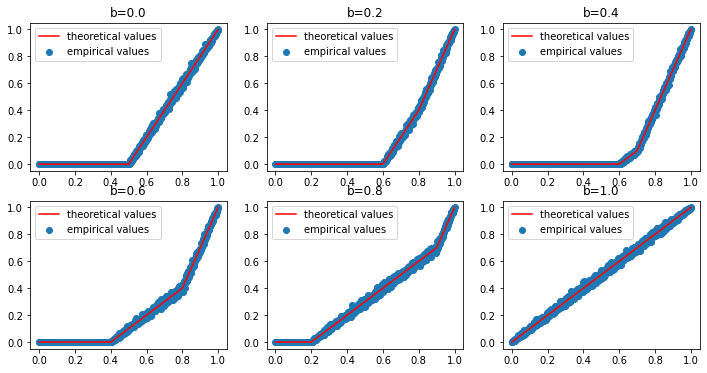

In [17]:
X = np.linspace(0, 1, 1000)
barriers = np.linspace(0, 1, 6)
n = 1000

for b in barriers:
    p_th = one_race_winning_probability(X, b)
    p_emp = for_one_barrier(X, b, n)
    
    plt.subplot(2, 3, int(b/0.2 + 1))
    plt.scatter(X, p_emp, label = "empirical values")
    plt.plot(X, p_th, 'r', label = "theoretical values")
    plt.legend()
    plt.gca().set_title("b={}".format(np.round(b, 2)))

    

General formulas for Mr White winning probabilities are given below:
- $b < \frac{1}{3}$
$$
P_{x, b}(W)=
\begin{cases}
0, & 0 \leq x \leq \frac{1+b}{2}\\
2x - (b+1) & \frac{1+b}{2} < x \leq 1 - b\\
3x - 2 & 1 - b < x \leq 1
\end{cases}
$$

- $b \geq \frac{1}{3}$
$$
P_{x, b}(W)=
\begin{cases}
0, & 0 \leq x \leq 1 - b\\
x + b - 1 & 1 - b < x \leq \frac{1+b}{2}\\
3x - 2 & \frac{1+b}{2} < x \leq 1
\end{cases}
$$

Once again, let's check this formulas with Monte Carlo simulations.

In [18]:
def theoretical_probabilities(X, b):
    if b < 1/3:
        p = [0] * len(X)
        # checkpoints
        first = np.argmax(X >= (1 + b)/2)
        second = np.argmax(X >= 1 - b)
        # transforming X values
        p[first:second] = 2 * X[first:second] - (b + 1)
        p[second:] = 3 * X[second:] - 2
        return p
    else:
        p = [0] * len(X)
        # checkpoints
        first = np.argmax(X >= 1 - b)
        second = np.argmax(X >= (1 + b)/2)
        # transforming X values
        p[first:second] = X[first:second] + b - 1
        p[second:] = 3 * X[second:] - 2
        return p
    

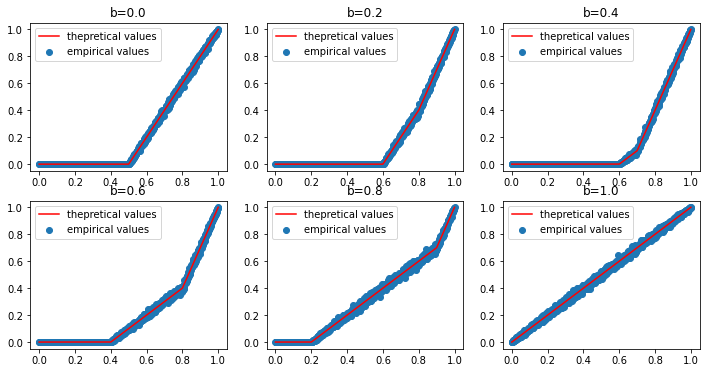

In [19]:
X = np.linspace(0, 1, 1000)
barriers = np.linspace(0, 1, 6)
n = 1000

for b in barriers:
    p_th = theoretical_probabilities(X, b)
    p_emp = for_one_barrier(X, b, n)
    
    plt.subplot(2, 3, int(b/0.2 + 1))
    plt.scatter(X, p_emp, label = "empirical values")
    plt.plot(X, p_th, 'r', label = "thepretical values")
    plt.legend()
    plt.gca().set_title("b={}".format(np.round(b, 2)))

As everything seems to be correct, we can continue our calculations.